# Введение в анализ данных
## Домашнее задание 3. 


**Правила:**

* Дедлайн **17 мая 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 3 балла

Сложная часть (необходимо на "отл"):

* Задача 2 -- 2 балла
* Задача 3 -- 10 баллов
* Задача 4 -- 4 балла

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

In [128]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go 

## Легкая часть

Перед выполнением этой части настоятельно рекомендуется посмотреть ноутбук с лекции про закон больших чисел.

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*.

**a).** Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$


In [132]:
size = 300
count = 500
sample = sps.expon.rvs(size=(count, size))

cum_mean = sample.cumsum(axis=1)

Z = (cum_mean-(np.arange(size)+1))/((np.arange(size)+1)**(1/2))
Z

array([[-0.84055627, -0.96066614, -0.8894683 , ...,  0.65459265,
         0.60937763,  0.60657818],
       [-0.3493728 , -0.72390111, -0.55642761, ...,  1.3827036 ,
         1.59510574,  1.54237357],
       [ 0.300328  , -0.10933274,  0.10831863, ..., -0.58955722,
        -0.63100117, -0.6777571 ],
       ...,
       [-0.17147225,  0.31530217,  0.17279743, ..., -1.2204834 ,
        -1.22573488, -1.21277473],
       [ 1.63374143,  3.63232019,  2.97799436, ..., -1.00378007,
        -1.05006344, -1.01489333],
       [ 2.66953467,  1.20389996,  0.71172081, ..., -1.47416207,
        -1.50040091, -1.52735035]])

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

(0, 300)

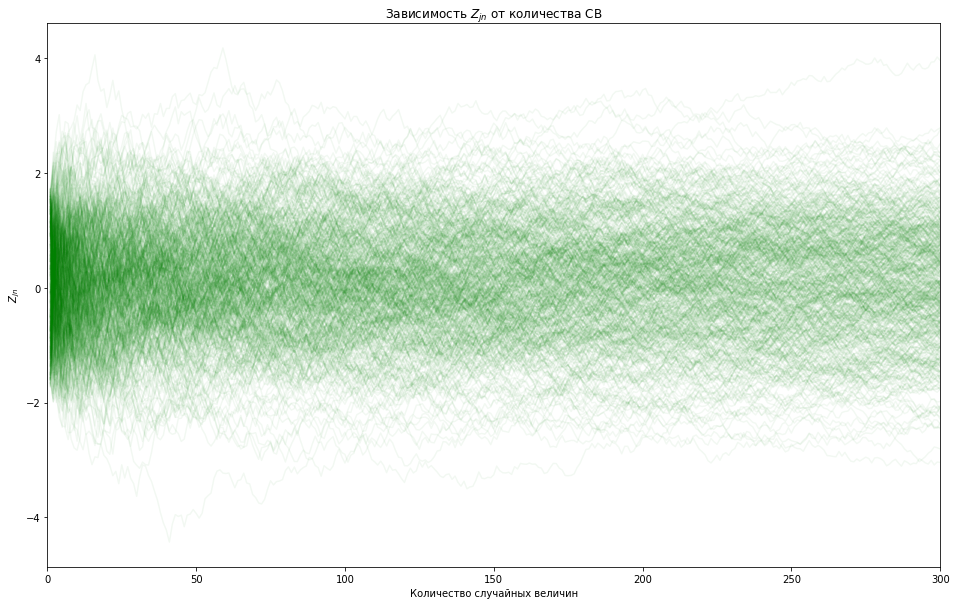

In [226]:
plt.figure(figsize=(16, 10))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, Z[i], color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('$Z_{jn}$')
plt.title('Зависимость $Z_{jn}$ от количества СВ')
plt.xlim((0, size))

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

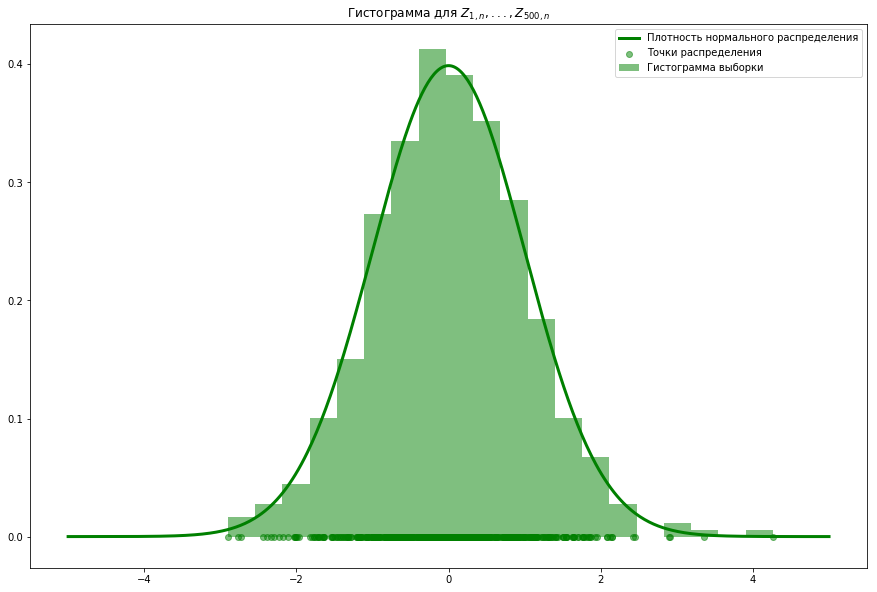

In [215]:
plt.figure(figsize=(16, 10))

n = 300
grid = np.linspace(-5, 5, 500)
zero = np.zeros(500)
plt.scatter(Z[:, n-1],
    zero,
    alpha=0.5,
    label='Точки распределения',
    color='green'
)
plt.hist(Z[:, n-1],
    bins=20,
    alpha=0.5,
    density=True,
    color='green',
)
plt.plot(grid,
    sps.norm(0, 1).pdf(grid),
    color='green',
    linewidth=3,
    label='Плотность случайной величины'
)

plt.title('Гистограмма для $Z_{1,n},...,Z_{500,n}$')
plt.legend(('Плотность нормального распределения',
            'Точки распределения', 'Гистограмма выборки'))
plt.show()

**Вывод:** действительно, точки выбрки хорошо ложаться на нормальное распределение.

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

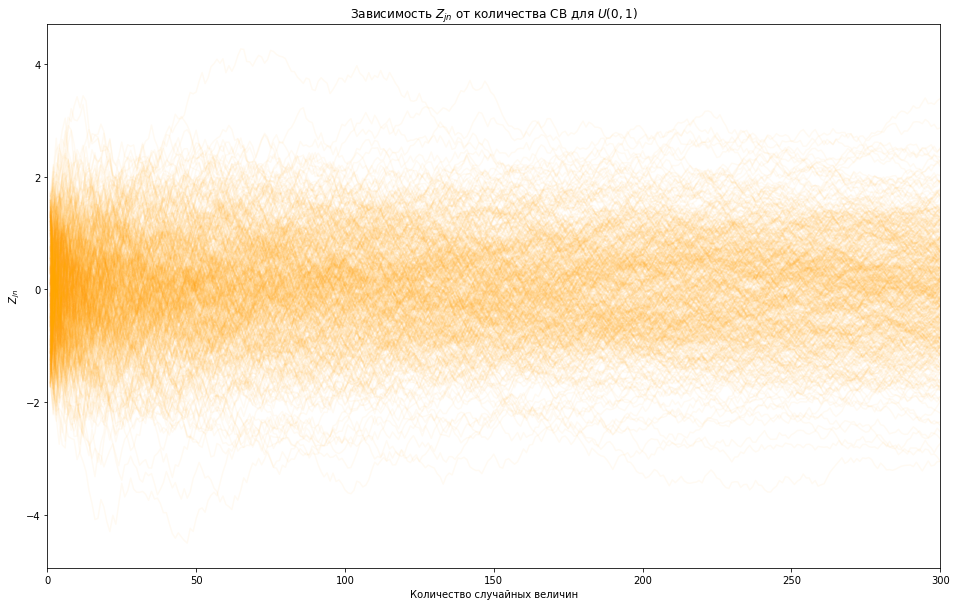

In [227]:
Usample = sps.uniform(0, 1).rvs(size=(count, size))

Ucum_mean = Usample.cumsum(axis=1)

Z = (Ucum_mean - (np.arange(size) + 1)*sps.uniform(0, 1) \
     .mean())/(((np.arange(size)+1) * sps.uniform(0, 1) \
                .var())**(1/2))
plt.figure(figsize=(16, 10))
for i in range(count):
    plt.plot(np.arange(size)+1, Z[i], color='orange', 
             alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('$Z_{jn}$')
plt.title('Зависимость $Z_{jn}$ от количества СВ для $U(0, 1)$')
plt.xlim((0, size))
plt.show()

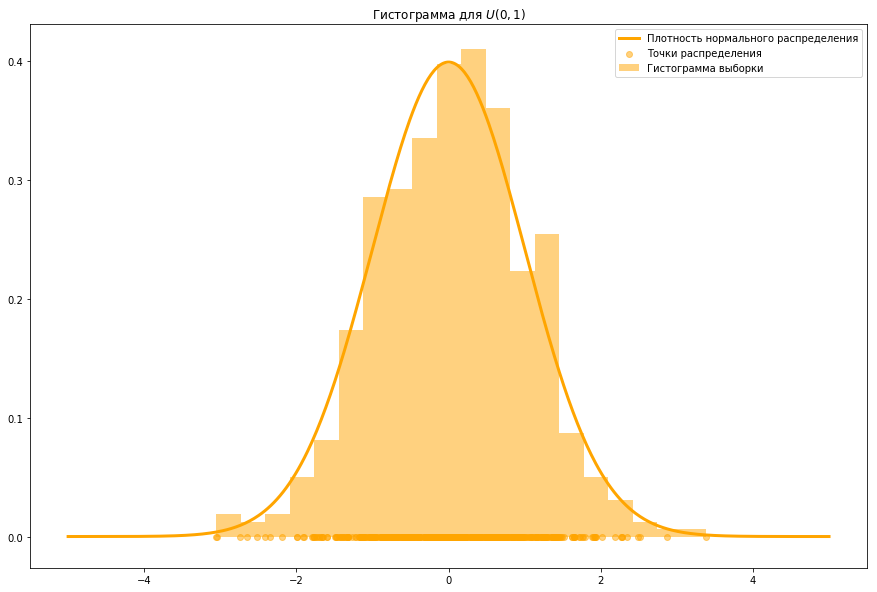

In [228]:
plt.figure(figsize=(16, 10))

n = 300
grid = np.linspace(-5, 5, 500)
zero = np.zeros(500)
plt.scatter(Z[:, n-1],
    zero,
    alpha=0.5,
    label='Точки распределения',
    color='orange'
)
plt.hist(Z[:, n-1],
    bins=20,
    alpha=0.5,
    density=True,
    color='orange',
)
plt.plot(grid,
    sps.norm(0, 1).pdf(grid),
    color='orange',
    linewidth=3,
    label='Плотность случайной величины'
)

plt.title('Гистограмма для $U(0,1)$')
plt.legend(('Плотность нормального распределения', 
            'Точки распределения', 'Гистограмма выборки'))
plt.show()

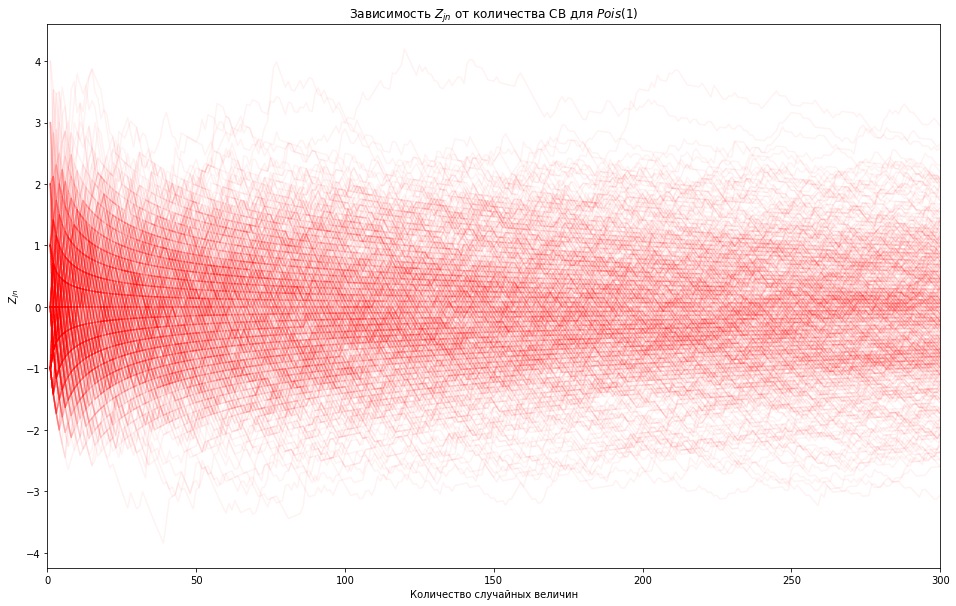

In [232]:
size = 300
count = 500
Psample = sps.poisson(mu=1).rvs(size=(count, size))

Pcum_mean = Psample.cumsum(axis=1)

Z = (Pcum_mean - (np.arange(size) + 1)*sps.poisson(mu=1) \
     .mean())/(((np.arange(size)+1)*sps.poisson(mu=1) \
                .var())**(1/2))

plt.figure(figsize=(16, 10))
for i in range(count):
    plt.plot(np.arange(size) + 1, Z[i], color='red', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('$Z_{jn}$')
plt.title('Зависимость $Z_{jn}$ от количества СВ для $Pois(1)$')
plt.xlim((0, size))
plt.show()

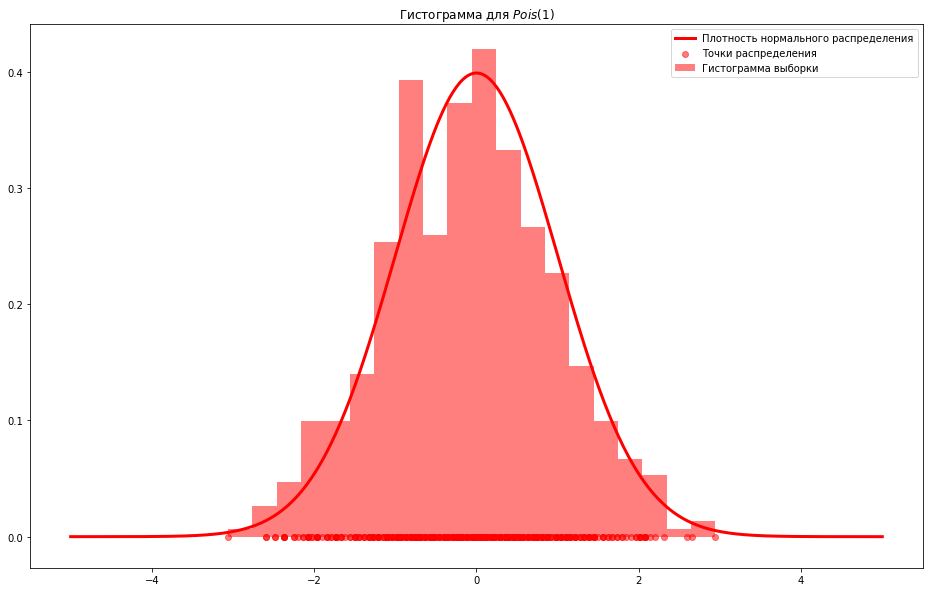

In [233]:
plt.figure(figsize=(16, 10))

n = 300
grid = np.linspace(-5, 5, 500)
zero = np.zeros(500)
plt.scatter(Z[:, n-1],
    zero,
    alpha=0.5,
    label='Точки распределения',
    color='red'
)
plt.hist(Z[:, n-1],
    bins=20,
    alpha=0.5,
    density=True,
    color='red',
)
plt.plot(grid,
    sps.norm(0, 1).pdf(grid),
    color='red',
    linewidth=3,
    label='Плотность случайной величины'
)

plt.title('Гистограмма для $Pois(1)$')
plt.legend(('Плотность нормального распределения',
            'Точки распределения', 'Гистограмма выборки'))
plt.show()

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** при большом количестве одинаково распределенных, независимых случайных величин выполняется  Центральная Предельная Теорема. Полученные распределения стремятся к нормальному.

## Сложная часть

### Задача 2.

В этой задаче нужно визуализировать *закон повторого логарифма*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из равномерного распределения на $\{-1, 1\}$. Согласно закону повторного логарифма траектория суммы $S_n = \xi_1 + ... + \xi_n$ при увеличении $n$ с вероятностью 1 бесконечное число раз пересекает границу $\pm (1-\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$, и лишь конечное число раз пересекает границу $\pm (1+\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов сумму в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Bern(1/2)$. По каждому из них посчитайте среднее $S_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумму по первым $n$ величинам $j$-го набора.

In [237]:
size = 300
count = 500
Bsample = (sps.bernoulli(0.5) \
           .rvs(size=(samples_count, size))- 0.5)*2
Bcum_mean = Bsample.cumsum(axis=1)

Для каждого $j$ нанесите на один график зависимость $S_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`.

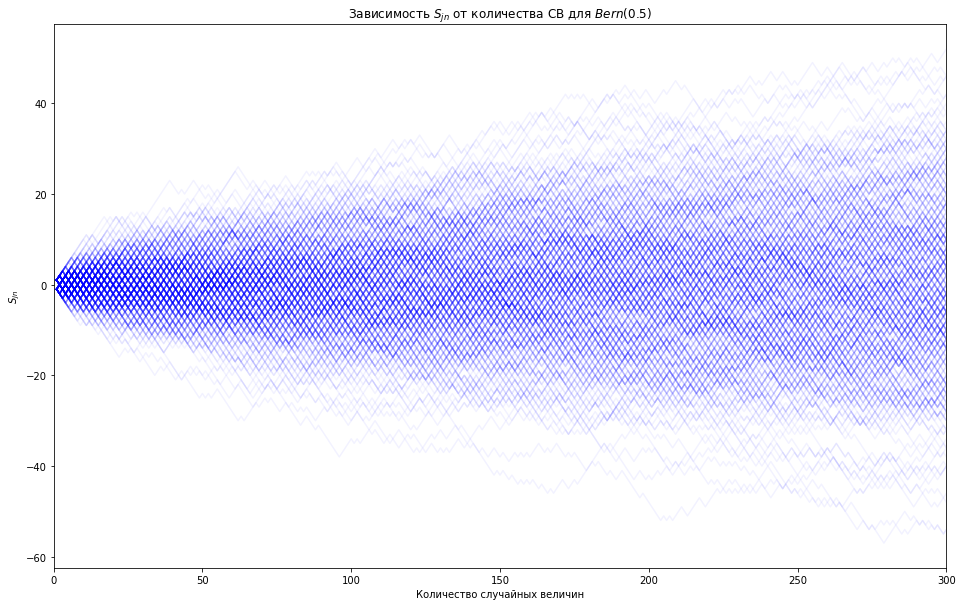

In [241]:
plt.figure(figsize=(16, 10))

for i in range(count):
    plt.plot(np.arange(size) + 1,
             Bcum_mean[i],
             color='blue',
             alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('$S_{jn}$')
plt.title('Зависимость $S_{jn}$ от количества СВ для $Bern(0.5)$')
plt.xlim((0, size))
plt.show()

Для трех различных $n$ по набору случайных величин $S_{1,n}, ..., S_{500,n}$ постройте графих доли тех величин, которые выходят за порог $\pm с\sqrt{2n\log\log n}$ при изменении $c$ от 0.5 до 1.5. Графики стройте в строчку с помощью `plt.subplot`.

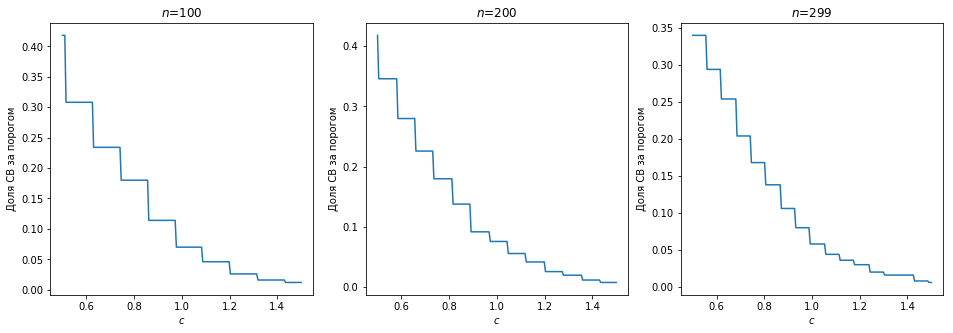

In [389]:
plt.figure(figsize=(16, 5))

for n, step in zip([100, 200, 299], range(1, 4)):
    plt.subplot(1, 3, step)
    S = Bcum_mean[:, n]
    c = np.linspace(0.5, 1.5, 200)
    x = np.array(list(map(lambda index:(abs(S)>index*((2*n*np \
                                                    .log(np \
                                                    .log(n)))**0.5)) \
                          .sum(), c))) / 500
    plt.title('$n$={}'.format(n))
    plt.plot(c, x)
    plt.xlabel('$c$')
    plt.ylabel('Доля СВ за порогом')

Сделайте вывод о смысле закона повторного логарифма. Подтверждают ли сделанные эксперименты теоретические свойства?

Закон повторного логарифма определяет порядок роста делителя последовательности сумм случайных величин, при котором эта последовательность не сходится к нулю, но остается почти всюду в конечных пределах.

**Вывод:** теорема подтверждается. В Эксперименте так и получилось, что последовательность не сходится к нулю, но оснается в конечных пределах.

---
### Задача 3.

В этой задаче нужно проявить и визуализировать свое *творчество*.

Общий принцип:
* Придумать какую-либо цель исследования, поставить вопрос или гипотезы
* Собрать необходимый набор данных "руками" или с помощью кода.
* Сделать простой анализ полученного датасета в этом ноутбуке.
* Сделать вывод.

Основные требования к данным:
* Все собранные данные необходимо представить в виде одной или нескольких таблиц формата `csv` или `xls`. Эти файлы должны легко считываться при помощи `pandas`. **Все эти файлы необходимо прислать вместе с решением на почту.**
* По строкам таблиц должны располагаться исследуемые объекты, например, люди. Одному объекту соответствует одна строка. По столбцам должны располагаться свойства объекта, например, пол, возраст.
* При сборе данных "руками" вы самостоятельно выбираете количество исследуемых объектов исходя из времени, которое необходимо на это потратить. Рассчитываемое время -- 2-3 часа.
* При сборе данных с помощью кода ограничивайте себя только размером доступных данных, которые можно скачать за 2-3 часа или 10000 объектами.
* Во всех случаях количество исследуемых объектов должно быть **не менее 30**. Количество свойств объектов -- **не менее двух**.

Основные требования к исследованию:
* Заранее необходимо четко определиться с вопросом, который вы хотите исследовать. Например, "хочу исследовать взаимосвязь двух свойств".
* При анализе необходимо провести полную визуализацию данных. Все графики должны быть оформлены грамотно.
* Подумайте, как вы можете применить полученные математические знания по курсу теории вероятностей для анализа собранных данных?
* Примените их если это возможно. Например, у вас не должно возникнуть проблем с тем, чтобы посчитать среднее, подкрепив корректность такого подхода соответствующей теоремой. А взаимосвязь двух свойств вы вряд ли сейчас сможете оценить по данным.
* Полноценные выводы.

Ниже перечислены некоторые идеи, но вы можете придумать свою. 
* Исследование характеристик и вкусовых качеств овощей/фруктов/ягод. В качестве свойств можно рассмотреть высоту объекта, радиус в разрезе, цвет, тип, вкусовую оценку, дату покупки, дату употребления.
* Исследование характеристик листьев деревьев. В качестве свойств можно рассмотреть длину и ширину листа, цвет, тип растения.
* Характеристики товаров в интернет-магазине, включая рейтинг.
* Музыкальные исполнители и песни. В качестве свойств можно рассмотреть рейтинг артиста, количество треков, количество ремиксов, количество коллабораций.
* Кинофильмы, мультфильмы, аниме.
* Анализ новостных лент. На сайте https://www.similarweb.com/ можно посмотреть статистику различных издательств, на основе чего придумать правило оценки степени "доверия" изданию. Исследуйте, какие новости первым публикует издание с наибольшим значением доверия? Опросите знакомых об отношении к этим новостям.
* Анализ данных пабликов ВК.
* Анализ схожести сайтов или блогов по частоте упоминания какой-либо темы.

Я решил собирать данные через телеграм-бота. Преимущества:
- Универсальность. Работает на всех платформах, где есть телеграм.
- Гибкость. Можно собирать более сложные данные, чем с помощью опросников.
- Дальнейшее использование. После регистрации можно получить нужную информацию, в моем случае о футбольном клубе.
- Хранилище. В структуру бота можно встроить СУБД, которая может хранить много данных, опросник не может.


Сам бот https://github.com/koshak98/Bot_Python. Рекомендую прочитать `README.md`


Сконвертируем получанные в `.csv` формат.


Прочитаем собранные данные.

In [390]:
df_footbal = pd.read_csv('Данные к ДЗ 3/Футбол.csv',
                         sep=';').dropna()
df_footbal.head()

,User id,Name,Club id,Age
0,0,Максим,1,20
1,1,Алексей,1,19
2,2,Александр,2,1000
3,3,Глеб,3,30
4,4,Антон,4,20


- `User id` - id регистрации конкретного пользователя.
- `Name` - только имя (first name) пользователя.
- `Club id` - id клуба. Пока нам неважно что это за клуб.
- `Age` - возраст регистрирующегося.

Построим график, возраста клуба от клуба.

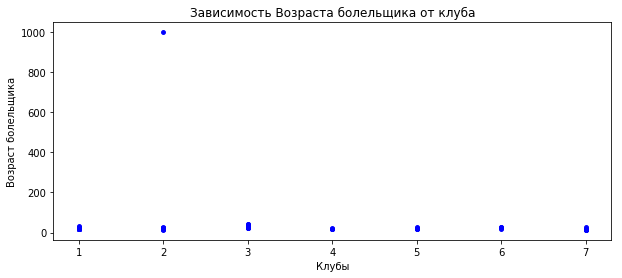

In [391]:
plt.figure(figsize=(10, 4))
plot = plt.scatter(df_footbal.loc[:, 'Club id'],
                   df_footbal.loc[:, 'Age'],
                   s=15, c='blue')
plt.xlabel('Клубы')
plt.ylabel('Возраст болельщика')
plt.title('Зависимость Возраста болельщика от клуба')
plt.show()

Видим ярко выраженный выброс: для втрого клуба есть болельщик с возрастом 1000. Уберем такие выбросы и построим тот же график.

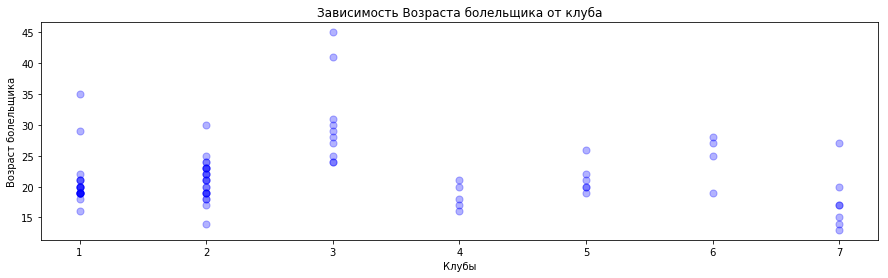

In [392]:
df_footbal = df_footbal.loc[df_footbal['Age'] <= 150]
plt.figure(figsize=(15, 4))
plot = plt.scatter(df_footbal.loc[:, 'Club id'],
                   df_footbal.loc[:, 'Age'],
                   s=50, c='blue', alpha=0.3)
plt.xlabel('Клубы')
plt.ylabel('Возраст болельщика')
plt.title('Зависимость Возраста болельщика от клуба')
plt.show()

 - **Цель** - установить зависимость между возрастом болельщиков и клубом, за который они переживают.
 - **Гипотиза** - существует зависимоть между возрастом болельщиков и клубом. Это зависимость следует из успешности клуба в то или иное время. В этом же период болельщик и начинает переживать за клуб.

Text(0.5, 1.0, 'Тепловая карта корреляции')

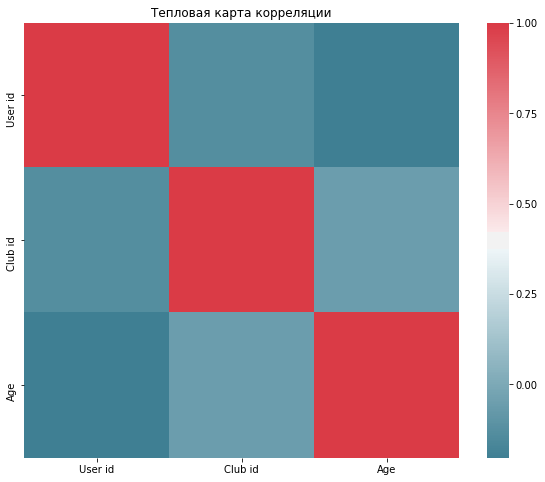

In [393]:
plt.subplots(figsize=(10, 8))
corr = df_footbal.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

plt.title('Тепловая карта корреляции')

**Вывод:** матрица корреляции показывает, что `User id` почти наверное не зависит ни от клуба ни от возраста. Логично, нет поводов полагать, что болельщики одного клуба отвечали подряд. Но такое возможно, например, если ссылку на бота скинули как раз таки в беседе болельщиков определленого клуба, тогда они бы отвечали подряд. Но такого для моего бота не случилось. А вот с `Club id` не все так очевидно: есть небольшая корреляция с `Age`. 


Продолжим исследование. Посмотрим на основные параметры наших данных.

In [39]:
df_footbal.Age.describe()

count    77.000000
mean     21.922078
std       5.438087
min      13.000000
25%      19.000000
50%      20.000000
75%      24.000000
max      45.000000
Name: Age, dtype: float64

Основной контингент для моего бота --- это студенты 1, 2, 3 курсов. Однако есть и представители других возрастных категорий.


Посмотрим конкретно для каждого клуба на ящики с умами.

Text(0.5, 1.0, 'Возраст болельщиков по клубам')

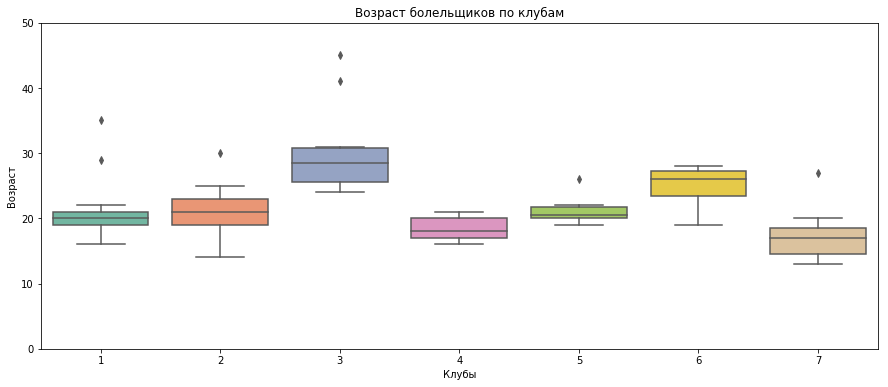

In [42]:
plt.figure(figsize=(15, 6))

plt.subplot(111)
sns.boxplot(x='Club id',
            y='Age', 
            data=df_footbal,
            palette='Set2')
plt.ylim(0, 50)
plt.ylabel('Возраст')
plt.xlabel('Клубы')
plt.title('Возраст болельщиков по клубам')

Все данные ложаться компактно, причем не по одному уровню для каждого клуба. Также значение дисперсии не велико. Из этого можно сделать вывод, что возраст болельщика связан с конкретным клубом.

Теперь подробно для каждого клуба поймем закономпрности. Для этого прочитаем таблицу с клубами.

In [394]:
df_club = pd.read_csv('Данные к ДЗ 3/Клубы.csv', 
                      sep=';')
df_club

,Club id,Club name
0,1,Real Madrid
1,2,Barcelona
2,3,Manchester United
3,4,Manchester City
4,5,Chelsea
5,6,Bayern
6,7,Juventus


С мерджим все таблицы по `Club id`

In [395]:
df_final = pd.merge(df_footbal, df_club, 
                    on='Club id', how='inner') \
.set_index('Club name')
df_final.head()

,User id,Name,Club id,Age
Club name,,,,
Real Madrid,0,Максим,1,20
Real Madrid,1,Алексей,1,19
Real Madrid,11,Ира,1,19
Real Madrid,15,Илья,1,21
Real Madrid,20,Максим,1,20


Оставим лишь нужные столбцы.

In [396]:
df_final_copy = df_final.loc[:, ['Age']]
df_final_copy = df_final_copy.groupby(by=['Club name']) \
.count().reset_index()
df_final_copy.rename(columns={'Age': 'Count'},
                     inplace=True)
df_final_copy

,Club name,Count
0,Barcelona,24
1,Bayern,4
2,Chelsea,6
3,Juventus,7
4,Manchester City,5
5,Manchester United,10
6,Real Madrid,21


Построим гистограмму количества болельщиков от клуба.

Text(0.5, 1.0, 'Количество болельщиков по клубам')

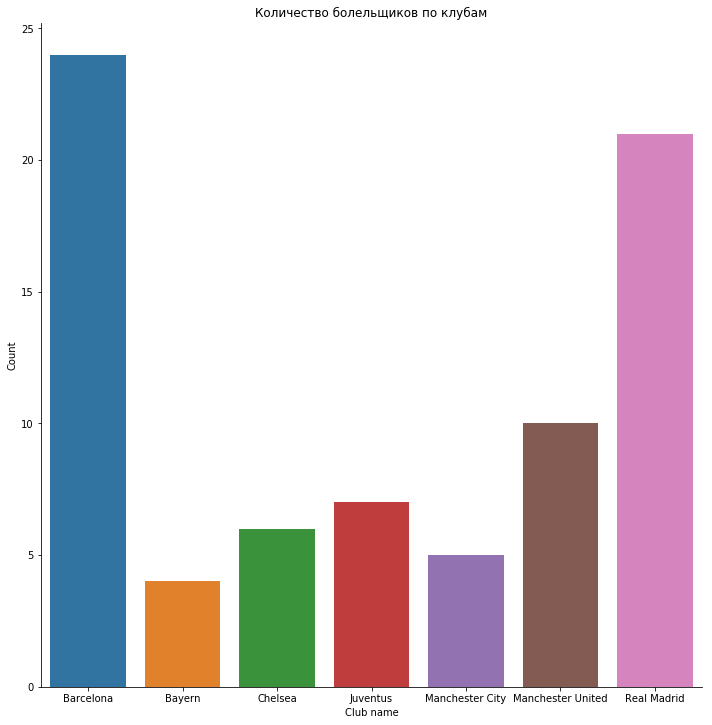

In [196]:
sns.catplot(x='Club name', y='Count',data=df_final_copy, kind='bar', height=10)
plt.title('Количество болельщиков по клубам')

Как видим больше всего люди болеют за Реал Мадрид и Барселону. За два самых престижных клуба в истории.


Так как мы уже определили, что есть некоторая зависимость между возрастом болельщика и его клубом, то найдем средний возраст болельщика по клубу.

In [397]:
df_final = pd.merge(df_final, df_final_copy \
                    .set_index('Club name'),
                    on='Club name', how='inner') \
.loc[:, ['Name', 'Age', 'Count']]
df_final.groupby(by=['Club name']).Age.mean()

Club name
Barcelona            21.125000
Bayern               24.750000
Chelsea              21.333333
Juventus             17.571429
Manchester City      18.400000
Manchester United    30.400000
Real Madrid          20.714286
Name: Age, dtype: float64

**Вывод:** исходя из исследования, можно утверждать, что существует зависимость между возрастом болельщика и клубом за который он болеет.
- Заметим, что средний возраст болельщиков `Manchester United` значительно выше, чем средний возраст болельщиков `Manchester City` хотя оба клуба из одного города. Такой резкий скачок связан с тем, что успех `Manchester United` приходится на конец 90-ых начало 00-ых, а прогресс `Manchester City` начался с приходом в этот клуб денег в 2010-ых годах.
- Среди болельщиков `Juventus` есть и очень молодые и зрелые. Пик популярность `Juventus` приходится на 00-ые года (этим объясняется старые) и переходом супер зверды мирового футбола Криштиану Роналду в 2018 году (этим объясняется приток молодых болельщиков).
- `Real Madrid` и `Barcelona` являются самыми популярными клубами в мировом футболе среди болельщиков. Средний возраст невелик. Это связанно с тем, что `Real Madrid` недавно выиграл 3 Лиги Чемпионов подряд , а `Barcelona` доминировала на протяжении нескольких лет в 2010-ых.

**Дополнительный вывод:** самым популярным клубом в мире является `Real Madrid` об этом, например можно почитать здесь https://www.championat.com/business/article-3316565-samye-populjarnye-kluby-evropy-real-barselona-manchester-junajted.html. Однако забавным фактом является то, что `Real Madrid` в России занимает лишь второе место по популярности, уступая `Barcelona`. Это я заметил и из личного опыта и из статистики по боту. Почему так произошло в России, ведь `Real Madrid` и титулование и богаче и медийние? В этом и заключается основная причина не любви российских болельщиков к `Real Madrid`. Как мы знаем роскошь и чрезмерная демонстрация преимущества над своими соперниками, чем так славится `Real Madrid`, в России подвергается наибольшей критике со стороны обычных среднестатистических граждан, потому что этой же роскошью зачастую злоупотребляют "высшие" слои общества России: от богатых футболистов до чиновников. С другой стороны появляется другой гранд из сепаратистской, борющейся за свои права и независимость, каталонской Барселоны.`Barcelona` является неким антиподом `Real Madrid`. Принятно говорить, что `Real Madrid` поддерживают аристократы, а `Barcelona` обычные работяги. Этот принцип в таком виде и дошел до российских болельщиков: стабильности, роскоши, аристократичности и чистокровью болельщики предпочитают борьбу за права, равенство уровня жизни и анархизм.

---
### Задача 4.

Некоторые студенты второго курса ФИВТ понадеявшись на отмену учета посещения занятий по курсу "Введение в анализ данных" решили дудосить гугл-опросники. Команда "Физтех.Статистики" без особых проблем смогла разделить результаты опроса на спамовые и настоящие, а также установить круг подозреваемых. Теперь это предлагается сделать вам как начинающим аналитикам.

Вам выдаются результаты нескольких опросов. 
1. Необходимо для каждой строки понять, является ли результат спамовым или настоящим. Результаты анализа необходимо прислать на почту вместе с решением.
2. Какими общими характеристиками обладают спамовые записи? Как часто они происходят?

In [377]:
df_5 = pd.read_excel('Данные к ДЗ 3/Лекция 5 марта.xlsx')
df_5.head()

,Отметка времени,Группа,Фамилия Имя
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений
1,2020-03-05 19:17:02.696,825,Чернов Андрей
2,2020-03-05 19:17:03.071,811,Чуров Дима
3,2020-03-05 19:17:03.192,824,Жуков Павел
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий


In [378]:
df_30 = pd.read_excel('Данные к ДЗ 3/Лекция 30 апреля.xlsx')
df_30.head()

,Отметка времени,ФИО,Группа
0,2020-04-30 19:18:38.415,Астафуров Евгений Олегович,812
1,2020-04-30 19:18:41.251,Севец Владислав Сергеевич,Б05-825
2,2020-04-30 19:18:41.327,Голяр Димитрис Георгиевич,Б05-826
3,2020-04-30 19:18:42.195,ГУСЕВ РОМАН ЕВГЕНЬЕВИЧ,823
4,2020-04-30 19:18:42.683,Богданов Сергей Владимирович,Б05-821


Заметим, что merge надо делать по ФИО, однако во второй таблице есть отчество. Оставим только фамилию.

In [399]:
df_30['ФИО'] = df_30['ФИО'].apply(lambda x: ' ' \
                                  .join(str(x) \
                                        .split(' ')[0: 2]))
df_30.head()

,Отметка времени,ФИО,Группа
0,2020-04-30 19:18:38.415,Астафуров Евгений,812
1,2020-04-30 19:18:41.251,Севец Владислав,Б05-825
2,2020-04-30 19:18:41.327,Голяр Димитрис,Б05-826
3,2020-04-30 19:18:42.195,ГУСЕВ РОМАН,823
4,2020-04-30 19:18:42.683,Богданов Сергей,Б05-821


In [380]:
df_final = pd.merge(df_5, df_30,
         left_on='Фамилия Имя', 
                    right_on='ФИО', 
                    how='outer')
df_final.head()

,Отметка времени_x,Группа_x,Фамилия Имя,Отметка времени_y,ФИО,Группа_y
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений,NaT,NaN,NaN
1,2020-03-05 19:17:02.696,825,Чернов Андрей,2020-04-30 19:18:56.430,Чернов Андрей,825
2,2020-03-05 19:17:03.071,811,Чуров Дима,NaT,NaN,NaN
3,2020-03-05 19:17:03.192,824,Жуков Павел,2020-04-30 19:18:45.420,Жуков Павел,824
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий,2020-04-30 20:30:09.053,Мальцев Дмитрий,Б05-813


In [381]:
result_list = df_final.dropna().drop_duplicates(subset=['ФИО'])
result_list = result_list.loc[:, ['Группа_x',
                                  'Фамилия Имя', 
                                  'Отметка времени_x',
                                  'Отметка времени_y']]
result_list.head()

,Группа_x,Фамилия Имя,Отметка времени_x,Отметка времени_y
1,825,Чернов Андрей,2020-03-05 19:17:02.696,2020-04-30 19:18:56.430
3,824,Жуков Павел,2020-03-05 19:17:03.192,2020-04-30 19:18:45.420
4,813,Мальцев Дмитрий,2020-03-05 19:17:04.713,2020-04-30 20:30:09.053
5,821,Наговицин Марк,2020-03-05 19:17:05.699,2020-04-30 19:18:42.965
6,825,Халилов Адель,2020-03-05 19:17:06.558,2020-04-30 19:18:45.249


In [382]:
df_5 = df_5.join(result_list['Фамилия Имя'],
                 how='outer', 
                 lsuffix='_left',
                 rsuffix='_right')
df_5.head()

,Отметка времени,Группа,Фамилия Имя_left,Фамилия Имя_right
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений,NaN
1,2020-03-05 19:17:02.696,825,Чернов Андрей,Чернов Андрей
2,2020-03-05 19:17:03.071,811,Чуров Дима,NaN
3,2020-03-05 19:17:03.192,824,Жуков Павел,Жуков Павел
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий,Мальцев Дмитрий


Там, где `NAN` будем считать за спам

In [383]:
spam = df_5[['Фамилия Имя_right']].isna()
spam.rename(columns={'Фамилия Имя_right': 'spam'},
            inplace=True)
df_5 = df_5.join(spam)
df_5 = df_5.loc[:, ['Отметка времени', 
                    'Группа',
                    'Фамилия Имя_left', 
                    'spam']]
df_5.head()

,Отметка времени,Группа,Фамилия Имя_left,spam
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений,True
1,2020-03-05 19:17:02.696,825,Чернов Андрей,False
2,2020-03-05 19:17:03.071,811,Чуров Дима,True
3,2020-03-05 19:17:03.192,824,Жуков Павел,False
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий,False


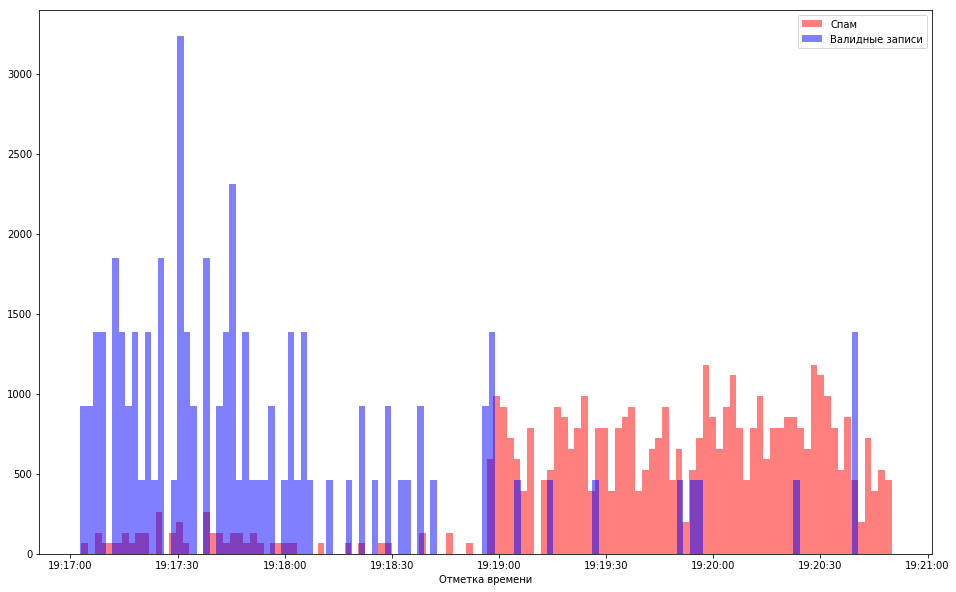

In [386]:
plt.figure(figsize=(16, 10))
plot_df = df_5[1:800]
plt.hist(plot_df[plot_df.spam]['Отметка времени'],
         bins=120,
         alpha=0.5, 
         color='red',
         density=True)
plt.hist(plot_df[plot_df.spam == False]['Отметка времени'], bins=120, 
         alpha=0.5, 
         color='blue',
         density=True)
plt.xlabel('Отметка времени')
plt.legend(['Спам', 'Валидные записи'])
plt.show()

**Вывод:** спамы есть и их активность достигалась в прожесутке от 19:19:00  до 19:20:45.